In [1]:
import keras

In [2]:
from keras.datasets import mnist

In [3]:
data = mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
len(train_images)

60000

In [5]:
len(train_labels)

60000

In [6]:
len(test_images)

10000

In [7]:
train_images = train_images.reshape((60000, 28, 28, 1))

In [8]:
test_images = test_images.reshape((10000, 28, 28, 1))

In [9]:
train_images = train_images.astype('float')/255 #normalization

In [10]:
test_images = test_images.astype('float')/255 #normalization

In [11]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

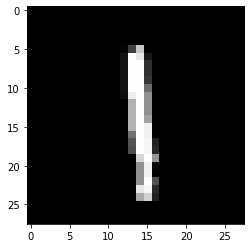

In [12]:
plt.imshow(image.array_to_img(train_images[8]), cmap="gray")

In [13]:
train_labels[8]

1

In [14]:
from keras.utils import to_categorical
train_labels_original = train_labels
train_labels = to_categorical(train_labels)

In [15]:
train_labels[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
test_labels_original = test_labels
test_labels = to_categorical(test_labels)

In [17]:
test_labels_original[7]

9

In [18]:
test_labels[7]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [19]:
from keras import layers, models

In [20]:
model = models.Sequential()

In [21]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.add(layers.MaxPooling2D((2,2)))

In [24]:
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.add(layers.MaxPooling2D((2,2)))

In [27]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.add(layers.Flatten())

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
____________________________________________________

In [31]:
model.add(layers.Dense(64, activation = 'relu'))

In [32]:
model.add(layers.Dense(10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [35]:
model.fit(train_images, train_labels, epochs = 100, batch_size=64)

Epoch 1/100
938/938 [==============================] - 11s 4ms/step - loss: 0.3898 - accuracy: 0.8769
Epoch 2/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0527 - accuracy: 0.9837
Epoch 3/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0316 - accuracy: 0.9907
Epoch 4/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0231 - accuracy: 0.9925
Epoch 5/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0184 - accuracy: 0.9943
Epoch 6/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0136 - accuracy: 0.9957
Epoch 7/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0111 - accuracy: 0.9968
Epoch 8/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0117 - accuracy: 0.9966
Epoch 9/100
938/938 [==============================] - 4s 5ms/step - loss: 0.0078 - accuracy: 0.9975
Epoch 10/100
938/938 [==============================] - 4s 5ms/step - loss: 0.0069 - accur

In [36]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2819 - accuracy: 0.9911


In [37]:
test_accuracy

0.991100013256073

In [38]:
predictions = model.predict_classes(test_images)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


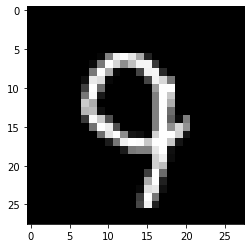

In [39]:
plt.imshow(image.array_to_img(test_images[999]), cmap="gray")

In [40]:
predictions[999]

9